# HPCCG

A simple conjugate gradient benchmark code for a 3D chimney
domain on an arbitrary number of processors.

---
## Parameters 
```
Compiler = icc (ICC) 18.0.1 20171018
Build_Flags = -g -O3 -march=native -ftree-vectorize -qopenmp -DUSING_OMP
Run_Parameters = 256 256 256
```

---
## Scaling

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

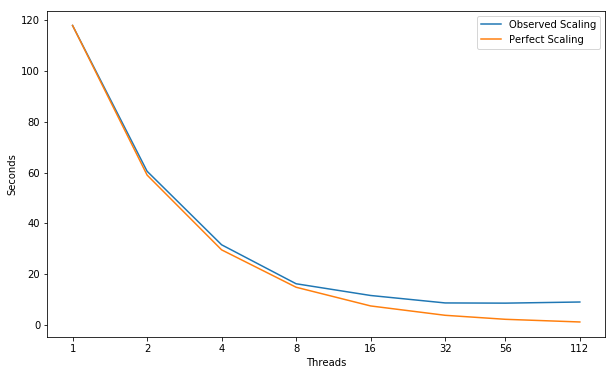

In [3]:
threads = [1, 2, 4, 8, 16, 32, 56, 112]
observedScaling = [118.0, 60.5, 31.5, 16.125, 11.5, 8.5625, 8.482142857142858, 8.928571428571429]
perfectScaling = [118.0, 59.0, 29.5, 14.75, 7.375, 3.6875, 2.107142857142857, 1.0535714285714286]
fig, ax = plt.subplots(); ax.set_xscale("log", basex=2); ax.set_xticks(threads)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.plot(threads, observedScaling, label="Observed Scaling")
ax.plot(threads, perfectScaling, label="Perfect Scaling")
ax.legend(); ax.set_xlabel("Threads"); ax.set_ylabel("Seconds")
plt.show()

---
## Performance Improvement

| Threads | 2 | 4 | 8 | 16 | 32 | 56 | 112 |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **Speed Up** | 1.95X | 1.92X | 1.95X | 1.40X | 1.34X | 1.01X | 0.95X |

### @ Note: We slow down then stop scaling.  Exhauting a resource? 
### @ Note: HyperThreading causes a slow down.  Latency, Dependency??

---
## Cache Miss Scaling

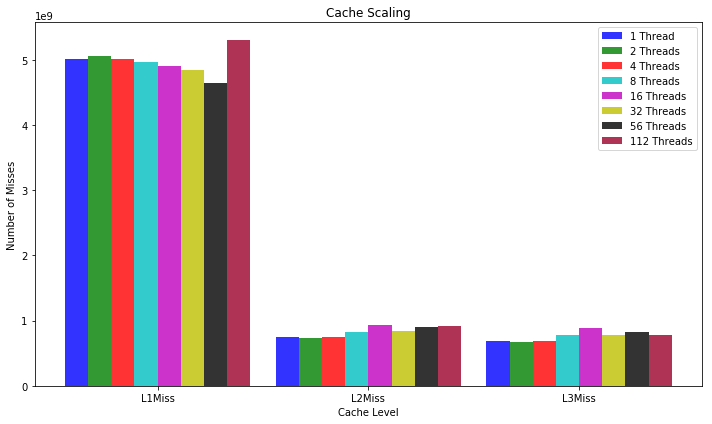

In [4]:
objects = ("L1Miss", "L2Miss", "L3Miss")
index = np.arange(len(objects)); bar_width = 0.11; opacity = 0.8

Thread1 = [5010000000.0, 750000000.0, 691000000.0]
Thread2 = [5060000000.0, 734000000.0, 667000000.0]
Thread4 = [5010000000.0, 746000000.0, 685000000.0]
Thread8 = [4970000000.0, 820000000.0, 779000000.0]
Thread16 = [4910000000.0, 935000000.0, 885000000.0]
Thread32 = [4840000000.0, 835000000.0, 786000000.0]
Thread56 = [4640000000.0, 895000000.0, 821000000.0]
Thread112 = [5310000000.0, 910000000.0, 776000000.0]

plt.bar(index, Thread1, bar_width, alpha=opacity, color="b", label="1 Thread")
plt.bar(index + bar_width, Thread2, bar_width, alpha=opacity, color="g", label="2 Threads")
plt.bar(index + (bar_width * 2), Thread4, bar_width, alpha=opacity, color="r", label="4 Threads")
plt.bar(index + (bar_width * 3), Thread8, bar_width, alpha=opacity, color="c", label="8 Threads")
plt.bar(index + (bar_width * 4), Thread16, bar_width, alpha=opacity, color="m", label="16 Threads")
plt.bar(index + (bar_width * 5), Thread32, bar_width, alpha=opacity, color="y", label="32 Threads")
plt.bar(index + (bar_width * 6), Thread56, bar_width, alpha=opacity, color="k", label="56 Threads")
plt.bar(index + (bar_width * 7), Thread112, bar_width, alpha=opacity, color="#9B0029", label="112 Threads")

plt.xlabel("Cache Level"); plt.ylabel("Number of Misses")
plt.xticks(index + (bar_width*3.5), objects); plt.title("Cache Scaling"); plt.legend()

plt.tight_layout()
plt.show()

---
## Hit Locations

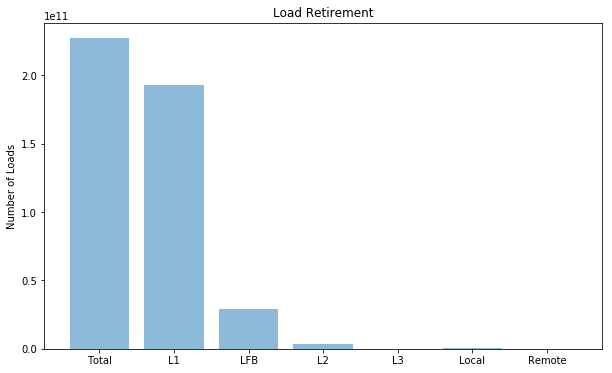

In [5]:
objects = ('Total', 'L1', 'LFB', 'L2', 'L3', 'Local', 'Remote')
y_pos = np.arange(len(objects))
measurements = [2.27e+11, 1.93e+11, 29200000000.0, 3720000000.0, 76100000.0, 689412754.0, 131587245.0]

plt.bar(y_pos, measurements, align="center", alpha=0.5)
plt.xticks(y_pos, objects); plt.ylabel("Number of Loads"); plt.title("Load Retirement")

plt.show()

---
## FLOPS
| Double Precision | Scalar | 128B Packed | 256B Packed | 512B Packed | Total FLOPS | GFLOPS/sec |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|
| PMU | 3.520e+10 | 6.790e+10 | 2.550e+09 | 0.000e+00 | 1.812e+11 | 2.136e+01 |
| SDE | 3.500e+10 | 6.748e+10  |  2.525e+09 | 0.000e+00  | 1.801e+11 | 2.123e+01  |

---
### Intel Software Development Emulator
| Intel SDE | HPCCG |
|:---|:---:|
| **Arithmetric Intensity** | 0.103 |
| **FLOPS per Inst** | 0.442 |
| **FLOPS per FP Inst** | 1.71 |
| **Bytes per Load Inst** | 7.96 |
| **Bytes per Store Inst** | 7.52 |

---
### Roofline - Intel(R) Xeon(R) Platinum 8180M CPU
#### 112 Threads - 56 - Cores 3200.0 Mhz  
|     GB/sec     |  L1 B/W |  L2 B/W |  L3 B/W | DRAM B/W |
|:---------------|:-------:|:-------:|:-------:|:--------:|
|**1 Thread**    |  159.33 |  91.42 |    47.08 |    21.27|
|**56 Threads**  | 9816.2 | 5579.1 |  1050.00\* |   198.4 |
|**112 Threads** | 9912.56 | 5573.58 |  1050.00\* |   203.13  |
#### \* L3 BW ERT unable to recognize.  Very short plateau ( estimate taken from graph3 )

<img src='HPCCG.png' /img>

### @ Note: DRAM BW bound?

---
## UOPS Executed

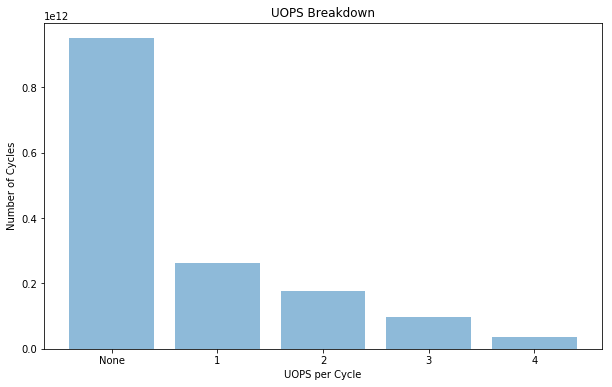

In [8]:
objects = ('None', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
measurements = [9.5e+11, 2.63e+11, 1.78e+11, 96700000000.0, 37100000000.0]

plt.bar(y_pos, measurements, align="center", alpha=0.5)
plt.xticks(y_pos, objects); plt.ylabel("Number of Cycles")
plt.xlabel("UOPS per Cycle"); plt.title("UOPS Breakdown")

plt.show()

### @ Note: Not getting much work out of OOO pipeline and largely stalled

---
## Experiment Aggregate Metrics
|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (100.0%)| 1.35 | 0.70 | 0.59 | 2.44% | 43.36% | 91.79% | 11.18% | 38.09% | 42.03% | 0.00% |
|56 (100.0%)| 0.42 | 0.20 | 0.17 | 2.04% | 44.08% | 91.52% | 2.71% | 24.03% | 65.88% | 0.00% |
|112 (100.0%)| 0.46 | 0.12 | 0.10 | 2.12% | 43.94% | 85.94% | 2.73% | 22.06% | 59.98% | 0.00% |

 ---
## HPC_sparsemv.cpp
|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (83.1%)| 1.39 | 0.77 | 0.68 | 1.86% | 42.24% | 72.59% | 11.36% | 38.16% | 42.23% | 0.00% |
|56 (70.4%)| 0.47 | 0.25 | 0.22 | 1.74% | 42.51% | 68.42% | 3.27% | 28.55% | 78.07% | 0.00% |
|112 (65.5%)| 0.48 | 0.13 | 0.12 | 2.19% | 42.56% | 75.15% | 3.51% | 28.05% | 76.01% | 0.00% |
 ```c++
 66 int HPC_sparsemv( HPC_Sparse_Matrix *A,
 67                  const double * const x, double * const y)
 68 {
 69 
 70   const int nrow = (const int) A->local_nrow;
 71 
 72 #ifdef USING_OMP
 73 #pragma omp parallel for
 74 #endif
 75   for (int i=0; i< nrow; i++)
 76     {
 77       double sum = 0.0;
 78       const double * const cur_vals =
 79      (const double * const) A->ptr_to_vals_in_row[i];
 80 
 81       const int    * const cur_inds =
 82      (const int    * const) A->ptr_to_inds_in_row[i];
 83 
 84       const int cur_nnz = (const int) A->nnz_in_row[i];
 85 
 ```
 
 |Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (64.5%)| 1.32 | 0.62 | 0.55 | 1.92% | 43.27% | 71.10% | 10.02% | 37.62% | 39.92% | 0.00% |
|56 (63.7%)| 0.41 | 0.20 | 0.17 | 1.78% | 44.29% | 63.23% | 2.87% | 28.25% | 75.00% | 0.00% |
|112 (60.1%)| 0.47 | 0.13 | 0.11 | 2.20% | 43.91% | 74.23% | 3.28% | 27.66% | 73.94% | 0.00% |
 
 ```c++
 86       for (int j=0; j< cur_nnz; j++)
 87           sum += cur_vals[j]*x[cur_inds[j]];
 88       y[i] = sum;
 89     }
 90   return(0);
 91 }
 ```

# Memory  Bound 
### We are preforming little work while not missing the L1 very often.  The indirect memory access creates a dependency.  We are also using a good portion of the DRAM bandwidth.  Unable to do useful work while DRAM loads are in flight?

### Further investigation: I assume the accesses to `x` are the loads that go out to DRAM due to the unknown index, causing us to wait for the quick access before making the possibly long access.

### Options for unrolling or vectorizing this loop?